### LAB - S08-L005 - metoda plot 1
1. Zaimportuj moduł pandas, numpy i matplotlib i nadaj im standardowe aliasy. Dodaj instrukcję powodującą wyświetlenie wykresu generowanego przez matplotlib w jupyter notebook.
2. Uruchom poniższy fragment kodu, aby przygotować dane do rysowania wykresu (wszystkie zastosowane polecenia powinny Ci już być na tym etapie znane):
        marathon = pd.read_csv("./course-files/marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
        marathon['40K'] = marathon['40K'].replace('-', 0)
        marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
        groupMF = marathon[ marathon["Country"].isin(["USA","CAN"]) ].groupby(by=["Country","M/F"])
        groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
        groupMF = groupMF.unstack()
        groupMF.columns = groupMF.columns.droplevel().droplevel()
        groupMF
3. Wyświetl wykres kolumnowy prezentujący prezentujący informacje o średnim czasie potrzebnym do przebiegnięcia maratonu z podziałem na kraje i płeć znajdujące się w groupMF (parametry domyślne)
4. Zmień wykres tak, aby kolumny dotyczące płci były ustawione jedna na drugiej (ten wykres nie ma dobrego znaczenia biznesowego, bo prezentujemy sumę wartości średnich...)
5. Zmień wykres tak, aby słupki były ułożone poziomo
6. Wykonaj poniższy kod, aby przygotować dane do kolejnego wykresu:
         age_data = marathon[ marathon["Country"].isin(["USA"]) ]
         age_data.head()
7. Na podstawie danych z age_data dla kolumny Age wygeneruj wykres histogramu. Przed wygenerowaniem wykresu możesz spróbować odgadnąć jaki jest wiek biegaczy, a potem porównać go z wynikiem widocznym na wykresie. Ciekawe czy zgadniesz...
8. Ponieważ na poprzednim wykresie słupki nie ilustrują każdego wieku biegacza (są sumaryczne):
    - policz ilość unikalnych wartości w kolumnie Age
    - odpowienim parametrem spraw, żeby ilość słupków histogramu była równa wyznaczonej liczbie
9. Wykonaj poniższy kod, aby przygotować dane:
         data_USA = marathon[ marathon["Country"].isin(["USA"]) ]
         data_USA.head()
10. Narysuj wykres pudełkowy dla data_USA ilustrując wartości z kolumny Age
11. Wykonaj poniższy kod, aby przygotować dane:
        USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
        CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
        df = pd.DataFrame({'USA':USA, 'CAN':CAN})
        df.head()
12. Narysuj wykres pudełkowy dla danych znajdujących się w zmiennej df

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [7]:
marathon = pd.read_csv("./course-files/marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon['40K'] = marathon['40K'].replace('-', 0)
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
groupMF = marathon[ marathon["Country"].isin(["USA","CAN"]) ].groupby(by=["Country","M/F"])
groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
groupMF = groupMF.unstack()
groupMF.columns = groupMF.columns.droplevel().droplevel()
groupMF

M/F,F,M
Country,,
CAN,13618.346012,12527.160190
USA,14187.362706,12998.130515


<AxesSubplot:xlabel='Country'>

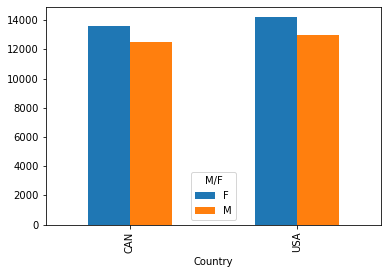

In [8]:
groupMF.plot(kind='bar')

<AxesSubplot:xlabel='Country'>

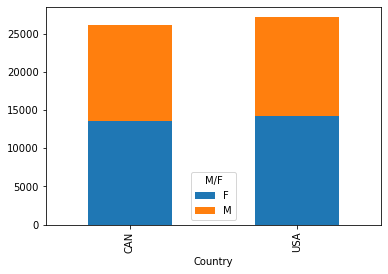

In [10]:
groupMF.plot(kind='bar', stacked = True )

<AxesSubplot:ylabel='Country'>

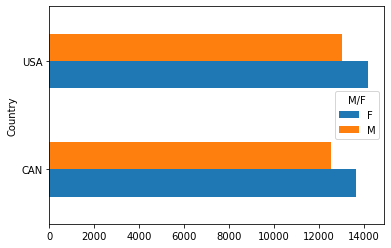

In [12]:
groupMF.plot(kind='barh')

In [13]:
age_data = marathon[ marathon["Country"].isin(["USA"]) ]
age_data.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<AxesSubplot:ylabel='Frequency'>

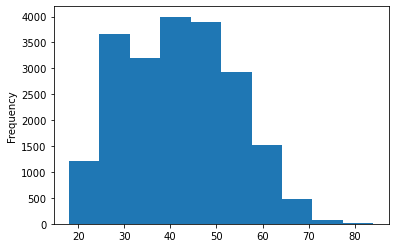

In [16]:
age_data['Age'].plot(kind='hist')

In [20]:
ageCountUnique = age_data['Age'].nunique()

<AxesSubplot:ylabel='Frequency'>

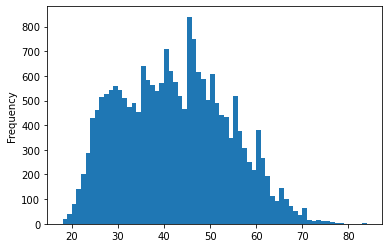

In [22]:
age_data['Age'].plot(kind='hist', bins = ageCountUnique)

In [24]:
data_USA = marathon[ marathon["Country"].isin(["USA"]) ]
data_USA.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<AxesSubplot:>

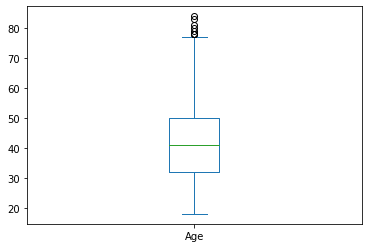

In [25]:
data_USA['Age'].plot(kind='box')

<AxesSubplot:>

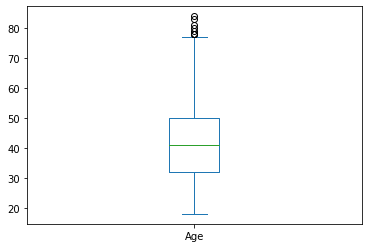

In [26]:
data_USA.plot(kind='box', y='Age')

In [27]:
USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
df = pd.DataFrame({'USA':USA, 'CAN':CAN})
df.head()

,USA,CAN
1,30.0,NaN
3,32.0,NaN
5,40.0,NaN
6,33.0,NaN
8,27.0,NaN


<AxesSubplot:>

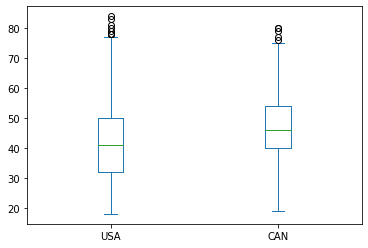

In [28]:
df.plot(kind='box')

In [29]:
df.tail()

,USA,CAN
26405,61.0,NaN
26406,25.0,NaN
26407,57.0,NaN
26408,64.0,NaN
26409,48.0,NaN


In [48]:
filter = df['CAN'].isnull()

In [50]:
df[~filter]

,USA,CAN
40,NaN,34.0
70,NaN,33.0
73,NaN,30.0
92,NaN,30.0
100,NaN,36.0
...,...,...
26197,NaN,73.0
26379,NaN,63.0
26381,NaN,60.0
26394,NaN,44.0
